## Machine Failure Dataset Project 2

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

##### Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [3]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
s[s>0]

Series([], dtype: int64)

In [4]:
df.shape

(136429, 14)

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

#### Separate X and Y

In [10]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [9]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0


In [8]:
Y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
136424,0
136425,0
136426,0
136427,0


In [11]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

##### Categorical and Continous Feature Separation

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

##### Create a Pipeline for feature selection with mutual information score

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [18]:
# Numeric pipeline
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# categorical Pipeline
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ord_enc',OrdinalEncoder())])

# Combine both pipeline
pre1 = ColumnTransformer([('num',num_pipe1,con),
                         ('cat',cat_pipe1,cat)])

In [19]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [21]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [22]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


#### Calculating mutual information score

In [23]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.00505404, 0.00240907, 0.01942328, 0.01985525, 0.0063339 ,
       0.00785828, 0.02441147, 0.01195607, 0.01964593, 0.00143404,
       0.01134027])

In [24]:
mi = pd.Series(mi)
mi.index=X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024411
num__Torque [Nm]                0.019855
num__OSF                        0.019646
num__Rotational speed [rpm]     0.019423
num__PWF                        0.011956
cat__Type                       0.011340
num__TWF                        0.007858
num__Tool wear [min]            0.006334
num__Air temperature [K]        0.005054
num__Process temperature [K]    0.002409
num__RNF                        0.001434
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

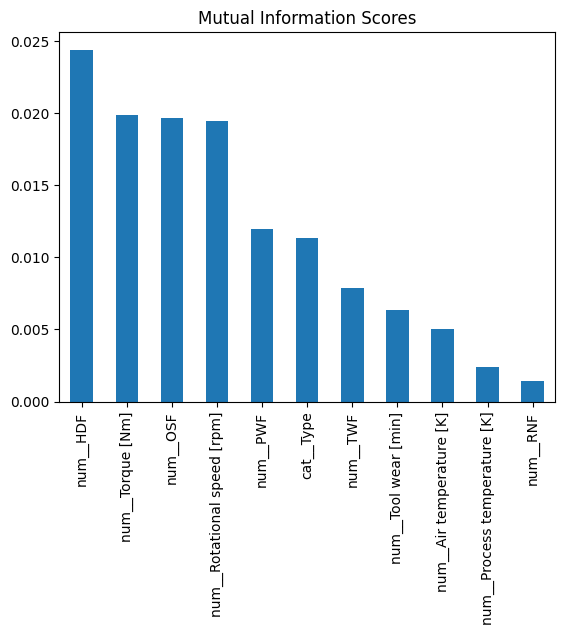

In [25]:
mi.plot(kind='bar',title='Mutual Information Scores')

In [31]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel= list(X_sel.columns[X_sel.dtypes!='object'])

In [32]:
cat_sel

['Product ID', 'Type']

In [33]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

##### Create a final model

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con),
                          ('cat',cat_pipe2, cat)])

In [29]:
X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
cols2 = pre2.get_feature_names_out()
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [31]:
X_pre2 = pd.DataFrame(X_pre2,columns=cols2)
X_pre2

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


##### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre2,Y,test_size=0.2,random_state=4)

In [33]:
xtrain.shape

(109143, 13)

In [34]:
xtest.shape

(27286, 13)

##### Evaluate Algorithms

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [36]:
dct = {'LogisticRegression':LogisticRegression(),
       'DecisionTree':DecisionTreeClassifier(),
       'RandomForest':RandomForestClassifier(),
       'GradientBoosting':GradientBoostingClassifier()}

In [37]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [38]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # fit model on training data
    model.fit(xtrain,ytrain)

    #predict train,test data results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    #calculating f1 score for training
    f1_tr = f1_score(ytrain,ypred_tr)

    #calculate cross validation score results
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_tr_cv = scores.mean()

    #calculate f1 scores testing
    f1_ts = f1_score(ytest,ypred_ts)

    #append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    #print the results
    print(f'model,name:{name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training cv : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n@@@@@@@@@@@@@@@@@@@@@@@@@@@@\n')


model,name:LogisticRegression

F1 Training : 0.8603
F1 Training cv : 0.8602
F1 Testing : 0.8734

@@@@@@@@@@@@@@@@@@@@@@@@@@@@

model,name:DecisionTree

F1 Training : 0.9965
F1 Training cv : 0.7568
F1 Testing : 0.7763

@@@@@@@@@@@@@@@@@@@@@@@@@@@@

model,name:RandomForest

F1 Training : 0.9965
F1 Training cv : 0.8560
F1 Testing : 0.8722

@@@@@@@@@@@@@@@@@@@@@@@@@@@@

model,name:GradientBoosting

F1 Training : 0.8707
F1 Training cv : 0.8561
F1 Testing : 0.8704

@@@@@@@@@@@@@@@@@@@@@@@@@@@@



#### Display all model scores in dataframe

In [39]:
dct.keys()

dict_keys(['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting'])

In [52]:
dct_eval = {'Model Name':(dct.keys()),
            'trainf1': tr ,
            'testf1': ts ,
            'Traincv': tr_cv}


In [53]:
eval_df = pd.DataFrame(dct_eval)
eval_df

,Model Name,trainf1,testf1,Traincv
0,LogisticRegression,0.860272,0.873418,0.860155
1,DecisionTree,0.996485,0.776316,0.756795
2,RandomForest,0.996491,0.872180,0.856015
3,GradientBoosting,0.870650,0.870440,0.856118


In [54]:
eval_df.sort_values(by='Traincv',ascending=False)


,Model Name,trainf1,testf1,Traincv
0,LogisticRegression,0.860272,0.873418,0.860155
3,GradientBoosting,0.870650,0.870440,0.856118
2,RandomForest,0.996491,0.872180,0.856015
1,DecisionTree,0.996485,0.776316,0.756795


#### Select logistic regression model
perform hyperparameter tunning on top model

In [55]:
params = {'C':[0.01,0.1,1,10,50,100,1000]}

In [56]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr,param_distributions=params,cv=5,scoring='f1',random_state=21)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   random_state=21, scoring='f1')

In [57]:
rscv.best_params_

{'C': 1}

In [58]:
rscv.best_score_

0.860154842127597

In [59]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=1)

##### Evaluate the model

In [60]:
best_lr.score(xtrain,ytrain)

0.9961426752059225

In [61]:
best_lr.score(xtest,ytest)

0.9963351169097706

#### Predict train and test data

In [62]:
ypred_tr = model.predict(xtrain)
ypred_ts =model.predict(xtest)

In [63]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [64]:
ytrain.head()

,Machine failure
119644,0
93147,0
41644,0
23440,0
54209,0


In [65]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [66]:
ytest.head()

,Machine failure
116652,0
27500,0
60327,0
35515,0
13863,0


#### Create a confusion metrics

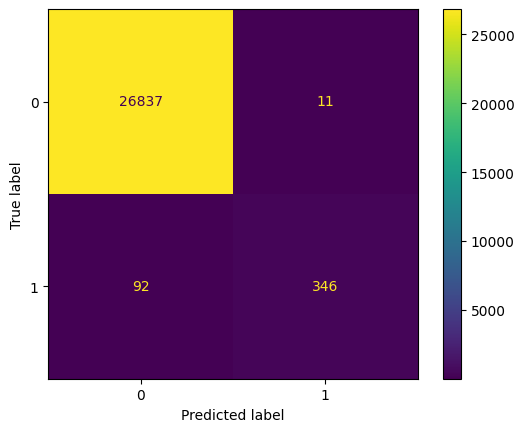

In [67]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_lr.classes_)
cfd.plot()

#### Print classification report

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.97      0.79      0.87       438

    accuracy                           1.00     27286
   macro avg       0.98      0.89      0.93     27286
weighted avg       1.00      1.00      1.00     27286



#### Calculating ROC-AUC Score

In [69]:

yprob_ts = best_lr.predict_proba(xtest)[:,1]
yprob_ts

array([0.00092804, 0.00286395, 0.00090975, ..., 0.00475975, 0.002946  ,
       0.00160534])

In [70]:
yprob_ts

array([0.00092804, 0.00286395, 0.00090975, ..., 0.00475975, 0.002946  ,
       0.00160534])

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,yprob_ts)

0.9508753149814141

#### Plot ROC-AUC Score

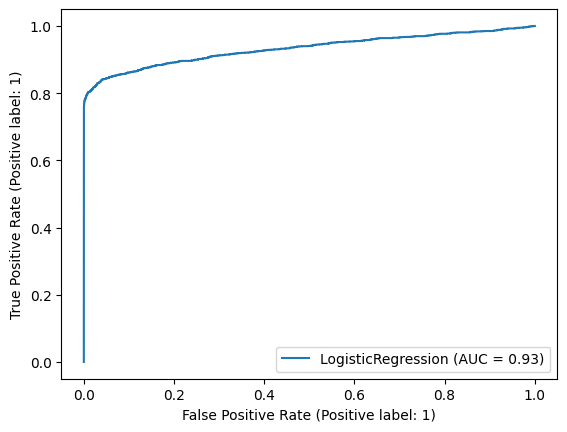

In [72]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

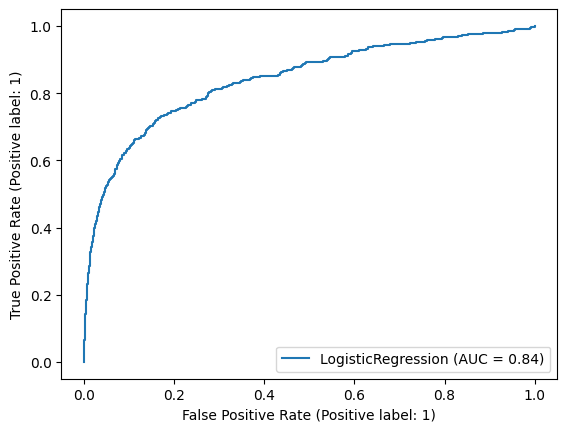

In [66]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtest,ytest)

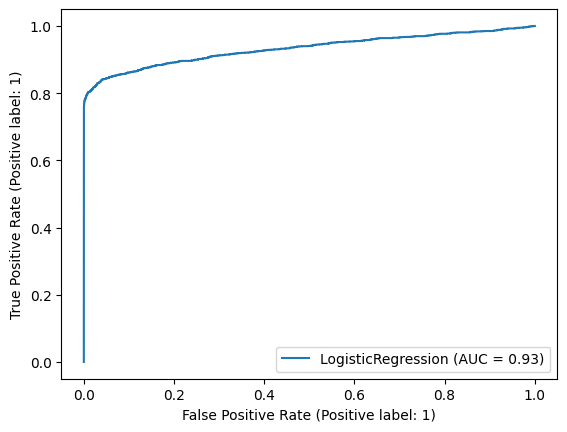

In [73]:
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

#### Predict test data

In [75]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [77]:
xnew.shape

(90954, 13)

In [76]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [78]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [79]:
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [80]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols2)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


#### Predict the Data

In [89]:
preds = best_lr.predict(xnew_pre)


In [90]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [91]:
prob=best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.00210731, 0.00104062, 0.00258443, ..., 0.00325174, 0.00260016,
       0.00212672])

#### Creating results into new dataframe

In [92]:
df_pred =xnew[['id']]
df_pred

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [93]:
df_pred['Machine failure']=preds
df_pred['Probability']=prob

In [94]:
df_pred

,id,Machine failure,Probability
0,136429,0,0.002107
1,136430,0,0.001041
2,136431,0,0.002584
3,136432,0,0.003526
4,136433,0,0.003584
...,...,...,...
90949,227378,0,0.002322
90950,227379,0,0.000528
90951,227380,0,0.003252
90952,227381,0,0.002600


<Axes: xlabel='Machine failure'>

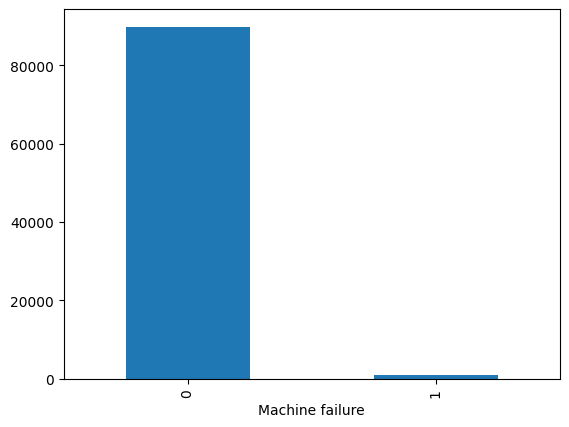

In [95]:
df_pred['Machine failure'].value_counts().plot(kind='bar')

In [97]:
df_pred[df_pred['Machine failure']==1]

,id,Machine failure,Probability
17,136446,1,0.995814
209,136638,1,0.997567
223,136652,1,0.995614
397,136826,1,0.998615
405,136834,1,0.996749
...,...,...,...
90503,226932,1,0.995433
90665,227094,1,0.999623
90679,227108,1,0.694807
90784,227213,1,0.991576


In [98]:
df_pred.to_csv('Predictions.csv',index=False)